Importing Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
sample_submid = pd.read_csv('sample_submission.csv')

In [3]:
train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2954,34,25,51,65,6314,240,237,103,...,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,...,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,...,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,...,0,0,0,0,0,0,0,0,0,3


In [4]:
test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4999995,2974,254,15,146,100,623,222,245,117,...,0,0,0,0,0,0,0,0,0,0
999996,4999996,3180,92,16,93,47,3740,209,201,142,...,0,0,0,0,0,0,0,0,1,0
999997,4999997,2684,51,20,34,123,962,199,225,145,...,0,0,0,0,1,0,0,0,0,0
999998,4999998,3309,64,12,196,93,2522,226,193,74,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('Number of null values in training set:',train.isnull().sum().sum())
print('Number of null values in test set:',test.isnull().sum().sum())

Number of null values in training set: 0
Number of null values in test set: 0


In [6]:
print(train.columns)

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

Exploring & Feature Engineer

- The target variable is Cover_Type, which we are trying to predict based on other features.
- The goal is to determine which type of cover a customer should buy.
- Cover_Type is a categorical variable that has 7 possible values.

various of value = 7
2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64


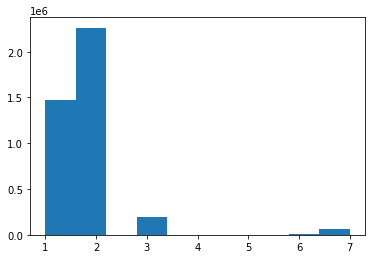

In [7]:
print('various of value =',train['Cover_Type'].nunique())
print(train['Cover_Type'].value_counts())
plt.hist(train['Cover_Type'])
plt.show()

In [8]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,...,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000
mean,1999999.500,2980.192,151.586,15.098,271.315,51.663,1766.642,211.838,221.061,140.811,...,0.037,0.038,0.012,0.016,0.011,0.012,0.041,0.039,0.032,1.771
std,1154700.683,289.048,109.961,8.547,226.550,68.216,1315.610,30.760,22.231,43.699,...,0.190,0.191,0.109,0.126,0.103,0.110,0.198,0.194,0.175,0.894
min,0.000,1773.000,-33.000,-3.000,-92.000,-317.000,-287.000,-4.000,49.000,-53.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,999999.750,2760.000,60.000,9.000,110.000,4.000,822.000,198.000,210.000,115.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,1999999.500,2966.000,123.000,14.000,213.000,31.000,1436.000,218.000,224.000,142.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
75%,2999999.250,3217.000,247.000,20.000,361.000,78.000,2365.000,233.000,237.000,169.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
max,3999999.000,4383.000,407.000,64.000,1602.000,647.000,7666.000,301.000,279.000,272.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


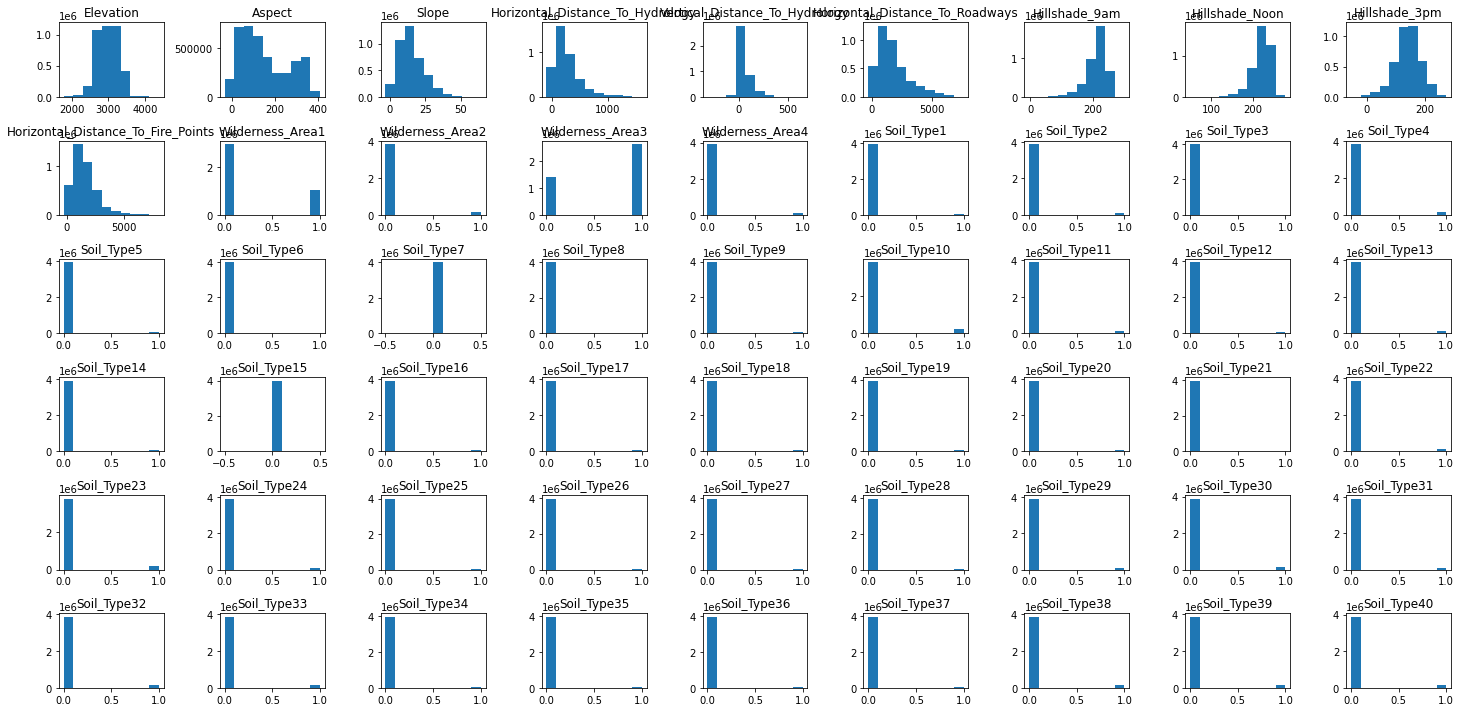

In [9]:
fig, ax = plt.subplots(6, 9, figsize=(20, 10))
for i, column in enumerate(train.columns[1:-1]):
    ax[i // 9, i % 9].hist(train[column])
    ax[i // 9, i % 9].set_title(column)

plt.tight_layout()
plt.show()

In [10]:
print(train.columns[train.eq(0).all()])

Index(['Soil_Type7', 'Soil_Type15'], dtype='object')


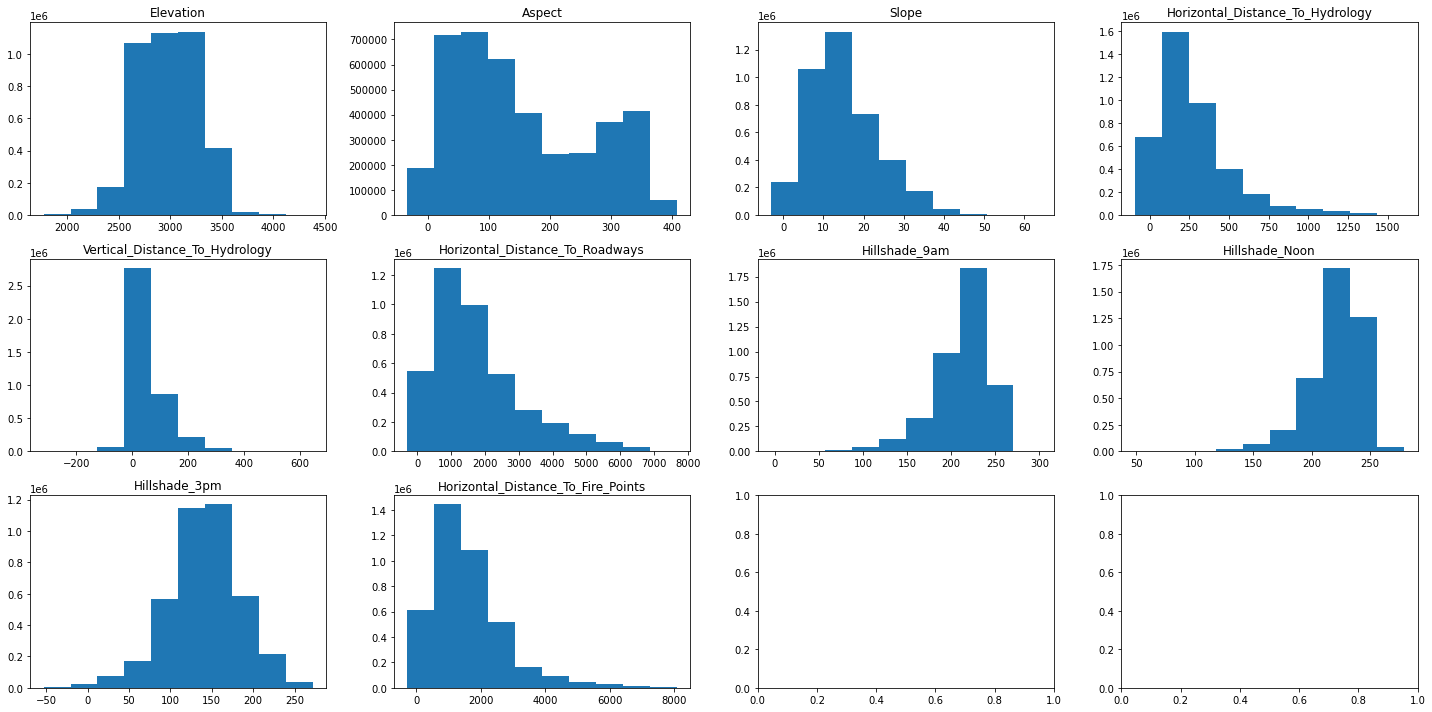

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for i, column in enumerate(train.columns[1:11]):
    ax[i // 4, i % 4].hist(train[column])
    ax[i // 4, i % 4].set_title(column)

plt.tight_layout()
plt.show()

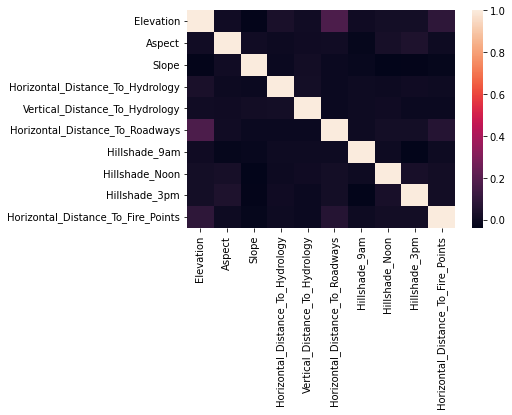

In [12]:
import seaborn as sns

sns.heatmap(train[train.columns[1:11]].corr())
plt.show()


- There is only one record that has a target value of 5. --> drop that record
- The features Soil_Type7 and Soil_Type15 both have a value of 0. --> drop these features
- Correlation bettween continuos features is low. --> Don't need to PCA

In [13]:
train = train.drop(train[train['Cover_Type'] == 5].index)
target = train['Cover_Type'] # get  target data 
train = train.drop(columns=['Id','Soil_Type7','Soil_Type15', 'Cover_Type']) # Id is not feature and Cover_Type is the target
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,0,0,0,0,0
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,0,0,0,0,0
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,0,0,0,0,0
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,0,0,0,0,0
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,2954,34,25,51,65,6314,240,237,103,1618,...,0,0,0,0,0,0,0,0,0,0
3999996,2926,104,8,696,83,5427,210,216,150,2863,...,0,0,0,0,0,0,0,0,0,0
3999997,2911,144,1,509,58,4820,195,192,91,92,...,0,0,0,0,0,0,0,0,1,0
3999998,2580,178,17,376,86,2592,225,183,39,1374,...,0,0,0,0,0,0,0,0,0,0


In [14]:
target

0          1
1          2
2          1
3          2
4          2
          ..
3999995    2
3999996    2
3999997    2
3999998    3
3999999    1
Name: Cover_Type, Length: 3999999, dtype: int64

Analysis

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import pickle

from sklearn.model_selection import cross_val_score

In [19]:
def save_model(model,path):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    print('The saving has been completed.')

def load_model(path):
    with open(path,'wb') as f:
        loaded = pickle.load(f)
    print('The saving has been completed.')
    return loaded

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3199999, 52)
(800000, 52)
(3199999,)
(800000,)


In [20]:
# Machine learning techniques
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = GradientBoostingClassifier()
model_4 = MLPClassifier()

# Choose the model
model = model_2
model_name = model.__class__.__name__

# Training
model.fit(X_train, y_train)
save_model(model,model_name+'_trained.pkl')
print("train is done")

The saving has been completed.
train is done


In [21]:
# Make predictions on the testing set
# model = load_model(model.__class__.__name__+'_trained.pkl')
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
print("predict is done")

predict is done


In [29]:
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train)

various of value = (array([1, 2, 3, 4, 6, 7], dtype=int64), array([297096, 456343,  36955,      3,    989,   8614], dtype=int64))


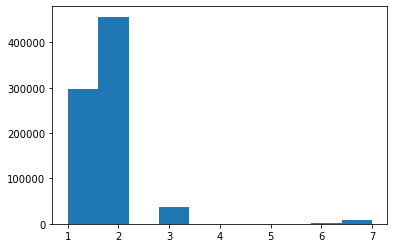

In [25]:
print('various of value =',np.unique(y_pred,return_counts=True))
#print(y_pred.value_counts())
plt.hist(y_pred)
plt.show()

In [ ]:
print('various of value =',np.unique(y_pred_train,return_counts=True))
#print(y_pred.value_counts())
plt.hist(y_pred_train)
plt.show()

Validation

In [32]:
print('Training Set')
print(classification_report(y_train,y_pred_train)) 
print('AUC Score',roc_auc_score(y_train,y_pred_prob_train, multi_class = 'ovo'))
print('')
print('Test Set')
print(classification_report(y_test,y_pred)) 
print('AUC Score',roc_auc_score(y_test,y_pred_prob, multi_class = 'ovo'))

Training Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1174493
           2       1.00      1.00      1.00   1809688
           3       1.00      1.00      1.00    156653
           4       1.00      1.00      1.00       294
           6       1.00      1.00      1.00      9123
           7       1.00      1.00      1.00     49748

    accuracy                           1.00   3199999
   macro avg       1.00      1.00      1.00   3199999
weighted avg       1.00      1.00      1.00   3199999

AUC Score 0.9999999980937069

Test Set
              precision    recall  f1-score   support

           1       0.95      0.97      0.96    293643
           2       0.97      0.98      0.97    452399
           3       0.91      0.86      0.88     39059
           4       0.33      0.01      0.02        83
           6       0.80      0.34      0.48      2303
           7       0.89      0.61      0.73     12513

    accuracy             

Create Submission

In [33]:
test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4999995,2974,254,15,146,100,623,222,245,117,...,0,0,0,0,0,0,0,0,0,0
999996,4999996,3180,92,16,93,47,3740,209,201,142,...,0,0,0,0,0,0,0,0,1,0
999997,4999997,2684,51,20,34,123,962,199,225,145,...,0,0,0,0,1,0,0,0,0,0
999998,4999998,3309,64,12,196,93,2522,226,193,74,...,0,0,0,0,0,0,0,0,0,0


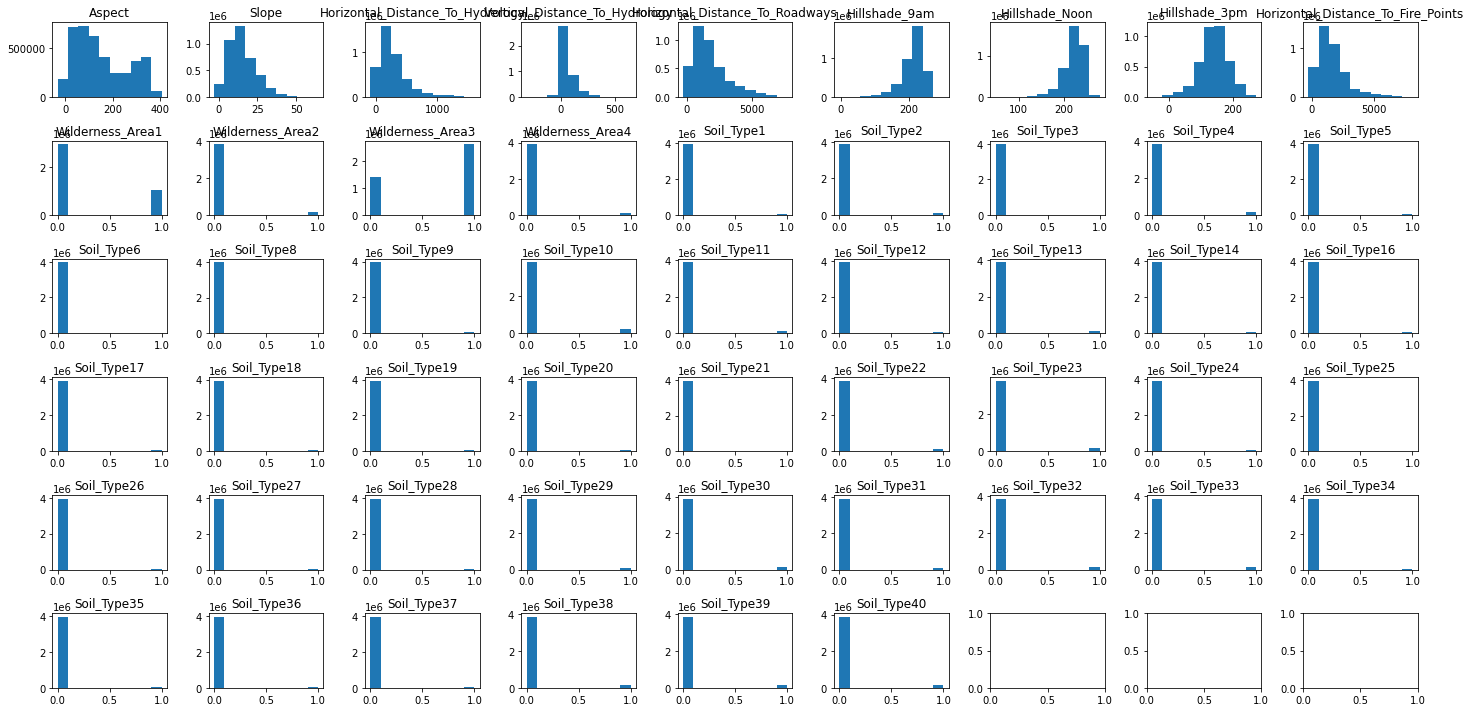

In [34]:
fig, ax = plt.subplots(6, 9, figsize=(20, 10))
for i, column in enumerate(train.columns[1:]):
    ax[i // 9, i % 9].hist(train[column])
    ax[i // 9, i % 9].set_title(column)

plt.tight_layout()
plt.show()

In [35]:
test = test.drop(columns=['Id','Soil_Type7','Soil_Type15'])

In [36]:
test_result = model.predict(test)

In [38]:
submid = sample_submid.drop(columns=['Cover_Type'])
submid['Cover_Type'] = test_result

In [39]:
submid

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,1
999997,4999997,2
999998,4999998,1


In [41]:
submid.to_csv(model_name+'_submid.csv', index=False)
print('export csv as',model_name+'_submid.csv')

export csv as RandomForestClassifier_submid.csv
